In [1]:
%matplotlib inline


# Demo of DBSCAN clustering algorithm


Finds core samples of high density and expands clusters from them.



In [11]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from PIL import Image
import numpy as np
from numpy import *
from sklearn import preprocessing as prep
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt
import sklearn.cross_validation as crval
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_mldata
from scipy.interpolate import interp1d
from sklearn.svm import LinearSVC
import pylab
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.mixture import GMM
from sklearn.neighbors import KernelDensity
import csv

X=[]
with open('X_tr.csv','r') as f:
    reader = csv.reader(f)
    for row1 in reader:
        X.append(row1)
print size(X)

X=np.asarray(X)
print X[0,:]

X=X.astype(np.float)


X=np.ravel(X)
X= X.reshape(5000, 14)
print(shape(X))

selX=X

selX_scaled=X
std_scal=prep.StandardScaler()
selX_scaled=std_scal.fit_transform(selX)
print('it had mean: ' +str(mean(selX))+' and std:'+ str(std(selX)))
print('NOW it has mean: '+str(mean(selX_scaled))+' and std: '+str(std(selX_scaled)))



Automatically created module for IPython interactive environment
70000
['0.11515' '1.5813' '0.62853' '-3.1255' '0.8644' '0.56255' '-4.7037'
 '0.76546' '-0.43798' '1' '0.80504' '0.97626' '0' '1']
(5000, 14)
it had mean: 0.189320838757 and std:2.26790120867
NOW it has mean: -2.27373675443e-17 and std: 1.0


Generate sample data


In [12]:
#centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                            random_state=0)

#X = StandardScaler().fit_transform(X)
X=selX_scaled

Compute DBSCAN


In [18]:
db = DBSCAN().fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print core_samples_mask
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

[False False False ..., False False False]
Estimated number of clusters: 13


Plot result


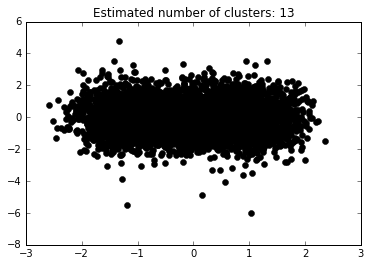

In [16]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()